In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import matplotlib.gridspec as gridspec
from scipy.stats import linregress

/tmp/ipykernel_12694/2346164844.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name='05_Oct_15_Oct_Exp')
df.head()

,Tube No,Type,2023-10-05 18:00:00,2023-10-07 18:00:00,2023-10-08 18:00:00,2023-10-09 19:30:00,2023-10-10 18:00:00,2023-10-11 18:00:00,2023-10-12 18:00:00,2023-10-13 18:00:00,2023-10-14 18:00:00,2023-10-15 18:00:00,3-6 Sal,0-3 Sal,Brine Weight,Brine Sal,Top T,Base T,Wicked Height,Finished
0,1.0,HARD,0.0,0.1,0.1,0.2,0.4,0.8,0.6,0.6,0.8,0.8,0.00,0.00,0.00,0.00,-5.8,-5.9,NaN,0.0
1,2.0,SOFT,0.0,0.1,0.2,0.4,1.0,1.5,1.2,1.5,1.6,1.8,0.00,0.00,0.00,0.00,-5.9,-7.0,NaN,0.0
2,3.0,HARD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.20,58.40,0.00,0.00,-6.1,-7.2,2.2,0.0
3,4.0,SOFT,0.0,0.0,1.4,2.0,2.3,3.0,3.4,4.1,5.1,6.0,33.08,49.82,35.43,70.21,-5.7,-6.9,2.8,1.0
4,5.0,SOFT,0.0,0.1,1.8,3.2,3.3,4.0,4.3,5.4,5.7,6.5,32.45,47.98,17.82,74.24,-6.6,-7.8,2.9,1.0


In [3]:
sheet_names = ['21_Aug_31_Aug_Exp','05_Oct_15_Oct_Exp']
snowtypes = ['SOFT','HARD']

for sheet in sheet_names:
    for snowtype in snowtypes:
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        
        print(sheet,snowtype)
        
        mean_end_height = np.nanmean(np.array(df['Wicked Height']).astype(np.float32))
        print(mean_end_height)
        
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==0]
        
        mean_start_height = np.nanmean(np.array(df['Wicked Height']).astype(np.float32))
        print(mean_start_height)
        
        print(100*mean_end_height/mean_start_height)
        
        print()

21_Aug_31_Aug_Exp SOFT
5.5125
3.6
153.12499875823653

21_Aug_31_Aug_Exp HARD
5.1875
3.4499998
150.36232715343127

05_Oct_15_Oct_Exp SOFT
2.8714287
2.2
130.5194848121408

05_Oct_15_Oct_Exp HARD
4.5
2.2
204.5454501120513



(0.0, 55.0)

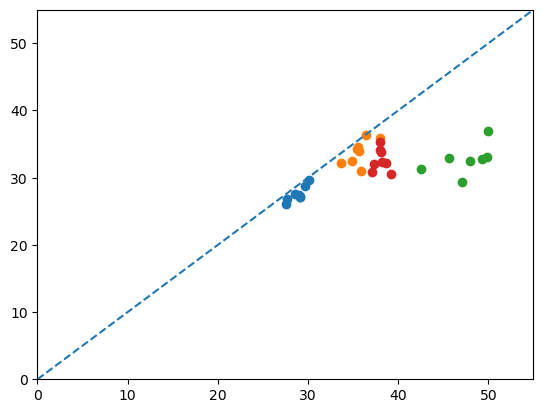

In [4]:
sheet_names = ['21_Aug_31_Aug_Exp','05_Oct_15_Oct_Exp']
snowtypes = ['SOFT','HARD']

for sheet in sheet_names:
    for snowtype in snowtypes:
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        
        plt.scatter(df['0-3 Sal'],df['3-6 Sal'])

l=55
plt.plot([0,l],[0,l],ls='--')

plt.ylim(0,l)
plt.xlim(0,l)
        


August Soft
10.1875
August Hard
5.0
October Soft
6.3428571428571425
1.8
October Hard
4.5125
0.8


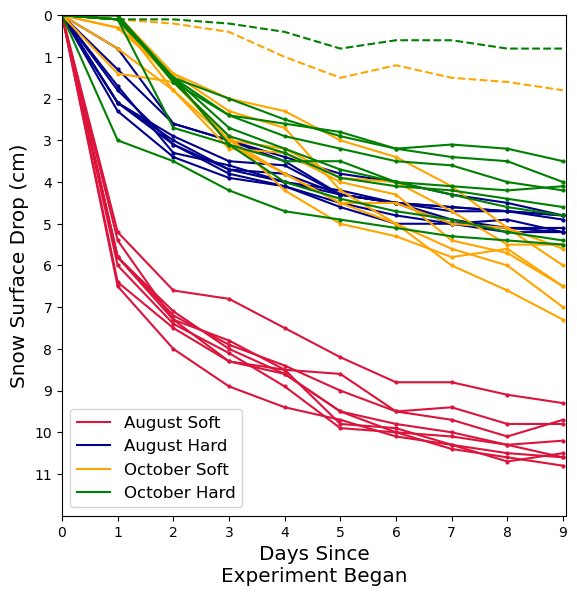

In [7]:
labels = ['August Soft', 'August Hard', 'October Soft', 'October Hard']

colors = ['crimson','darkblue','orange','green']

fig, ax1 = plt.subplots(1,figsize=(6.5,6.5))

dfs = {}

i0, i1 = 2, 12
        
for (sheet, snowtype), label, color in zip(itertools.product(sheet_names,snowtypes),labels,colors):
    
        print(label)
    
        plt.plot([],[],label=label,color=color)
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        
        dfs[label] = df.iloc[:,2:i1]
        
        print(np.nanmean(df.iloc[:,i1-1]))
        
        for rownum in range(df.shape[0]):
            
            ts = np.array(df.iloc[rownum,2:i1]).astype(np.float32)
            
            ts[0] = 0
            
            plt.plot(np.arange(len(ts)),[]+list(ts),color=color,marker='o',ms=2)
            
        if "October" in label:
            df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
            df = df[df['Type']==snowtype]
            x = np.array(df.iloc[0,2:i1])

            plt.plot(x,color=color,ls='--')
            print(x[-1])
            
plt.legend(loc='lower left',fontsize='large')

plt.ylim(12,0)
plt.xlim(0,9.05)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,12))

plt.ylabel('Snow Surface Drop (cm)',fontsize='x-large')
plt.xlabel('Days Since\nExperiment Began',fontsize='x-large')

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/figs/snow_settling.png',dpi=500,bbox_inches='tight')
plt.savefig('/home/robbie/Dropbox/dye_brine/Paper/Figures/F6.png',dpi=500,bbox_inches='tight')

In [8]:
x = dfs['October Soft'].iloc[:,-2:]
y = np.diff(x.to_numpy(),axis=1)
np.nanmean(y)

0.6857142857142858

In [10]:
x.to_numpy()

array([[5.1, 6. ],
       [5.7, 6.5],
       [5.6, 6.5],
       [6.6, 7.3],
       [6. , 7. ],
       [5.5, 5.5],
       [5.1, 5.6]])

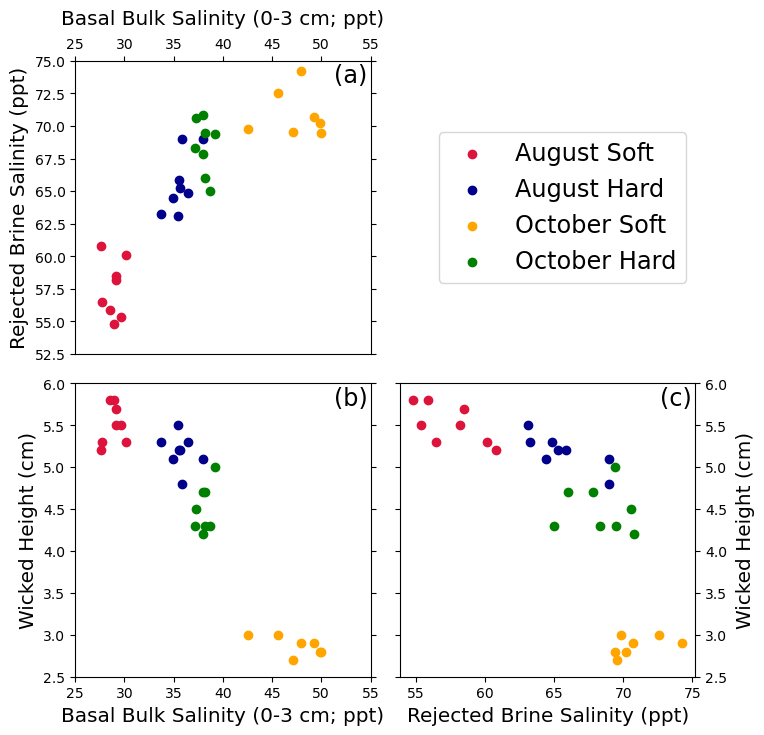

In [11]:
labels = ['August Soft', 'August Hard', 'October Soft', 'October Hard']

colors = ['crimson','darkblue','orange','green']

fig, axs = plt.subplots(2,2,figsize=(8,8))

ax1,axblank,ax2,ax3 = axs.reshape(-1)

axblank.remove()
        
for (sheet, snowtype), label, color in zip(itertools.product(sheet_names,snowtypes),labels,colors):
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        
        ax1.scatter(df['0-3 Sal'],
                    df['Brine Sal'],
                    label=label,
                   color=color)
        
        ax2.scatter(df['0-3 Sal'],
                    df['Wicked Height'],
                    label=label,color=color)
        
        ax3.scatter(df['Brine Sal'],
                    df['Wicked Height'],label=label,color=color)
        
#         ax4.scatter(df['Brine Weight'],df['Wicked Height'],label=label,color=color)

# ax4.set_ylabel('Wicked Height (cm)')
# ax4.set_xlabel('Rejected Brine Weight')

ax1.set_ylim(52.5,75)
ax2.set_ylim(2.5,6)
ax3.set_ylim(2.5,6)

ax1.set_xlim(25,55)
ax2.set_xlim(25,55)

ax3.set_ylabel('Wicked Height (cm)',fontsize='x-large',labelpad=20)
ax3.set_xlabel('Rejected Brine Salinity (ppt)',fontsize='x-large')

ax2.set_ylabel('Wicked Height (cm)',fontsize='x-large')
ax2.set_xlabel('Basal Bulk Salinity (0-3 cm; ppt)',fontsize='x-large')

ax1.set_ylabel('Rejected Brine Salinity (ppt)',fontsize='x-large')
ax1.set_xlabel('Basal Bulk Salinity (0-3 cm; ppt)',fontsize='x-large',labelpad=20)

ax3.yaxis.tick_right()
ax3.yaxis.label_position = 'right'

ax1.xaxis.tick_top()
ax1.xaxis.label_position = 'top'


ax1.legend(fontsize='xx-large',bbox_to_anchor=(1.65,0.5),loc='center')

ax1.annotate('(a)',xy=(0.99,0.99),ha='right',va='top',xycoords='axes fraction',fontsize='xx-large')
ax2.annotate('(b)',xy=(0.99,0.99),ha='right',va='top',xycoords='axes fraction',fontsize='xx-large')
ax3.annotate('(c)',xy=(0.99,0.99),ha='right',va='top',xycoords='axes fraction',fontsize='xx-large')

for ax in [ax1,ax2,ax3]:
    ax.tick_params(axis="y", which="both",right=True,left=True)

plt.subplots_adjust(hspace=0.1,wspace=0.1)

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/figs/brine_salinities.png',dpi=500,bbox_inches='tight')
plt.savefig('/home/robbie/Dropbox/dye_brine/Paper/Figures/F5.png',dpi=500,bbox_inches='tight')

In [12]:
basal_sal = []
rejected_sal = []
wicked_height = []
rejected_weight = []


for (sheet, snowtype), label, color in zip(itertools.product(sheet_names,snowtypes),labels,colors):
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        
        basal_sal += list(df['0-3 Sal'])
        rejected_sal += list(df['Brine Sal'])
        wicked_height += list(df['Wicked Height'])
        rejected_weight += list(df['Brine Weight'])

print('Wicked Height vs Basal Sal ')
print(linregress(wicked_height,basal_sal))
print()

print('Rejected vs Basal Sal ')
print(linregress(rejected_sal,basal_sal))

Wicked Height vs Basal Sal 
LinregressResult(slope=-6.106895744247607, intercept=65.11764925677052, rvalue=-0.9247934395101634, pvalue=1.0663239671388587e-13, stderr=0.46654839003676957, intercept_stderr=2.1841146065659967)

Rejected vs Basal Sal 
LinregressResult(slope=1.0500897393198323, intercept=-31.5095656552544, rvalue=0.850330980178406, pvalue=1.4019081588228068e-09, stderr=0.1206785494385949, intercept_stderr=7.923523363794403)


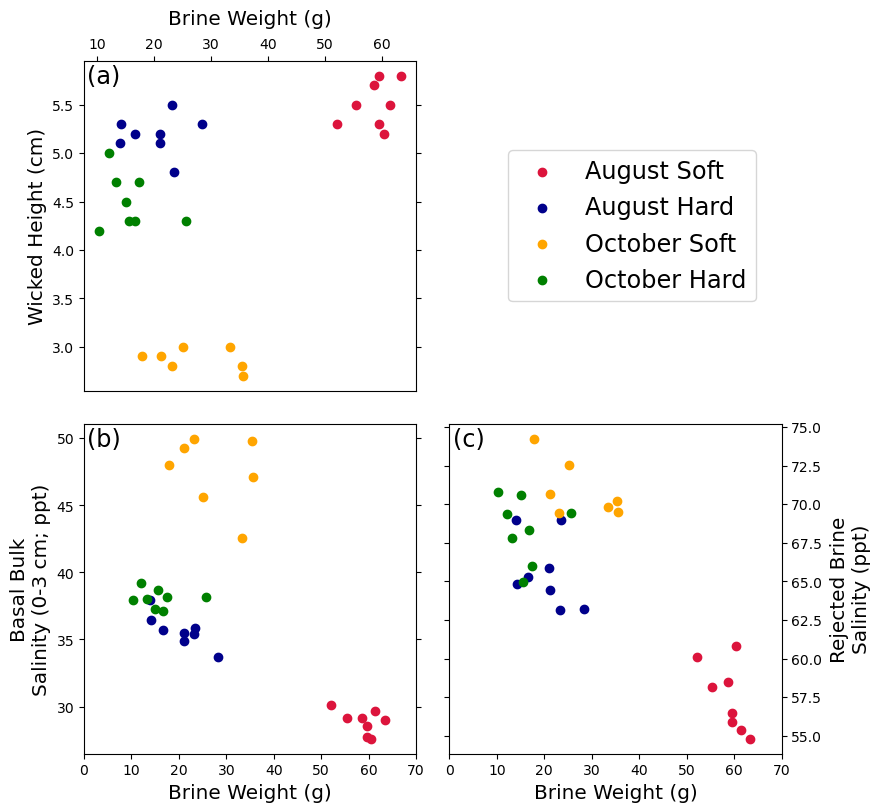

In [10]:
fig, axs = plt.subplots(2,2,figsize=(9,9))

ax1,axblank,ax2,ax3 = axs.reshape(-1)
axblank.remove()
        
for (sheet, snowtype), label, color in zip(itertools.product(sheet_names,snowtypes),labels,colors):
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        
        ax1.scatter(df['Brine Weight'],
                    df['Wicked Height'],
                    label=label,
                   color=color)
        
        ax2.scatter(df['Brine Weight'],
                    df['0-3 Sal'],
                    label=label,color=color)
        
        ax3.scatter(df['Brine Weight'],
                    df['Brine Sal'],label=label,color=color)
        

ax2.set_ylabel('Basal Bulk\nSalinity (0-3 cm; ppt)',fontsize='x-large')

ax1.set_ylabel('Wicked Height (cm)',fontsize='x-large')

ax3.set_ylabel('Rejected Brine\nSalinity (ppt)',fontsize='x-large',labelpad=35)

for ax in [ax2,ax3]:
    ax.set_xlabel('Brine Weight (g)',fontsize='x-large')
    ax.set_xlim(0,70)

ax1.set_xlabel('Brine Weight (g)',fontsize='x-large',labelpad=20)
    
ax3.yaxis.tick_right()
ax3.yaxis.label_position = 'right'

ax1.xaxis.tick_top()
ax1.xaxis.label_position = 'top'


ax1.legend(fontsize='xx-large',bbox_to_anchor=(1.65,0.5),loc='center')

ax1.annotate('(a)',xy=(0.01,0.99),ha='left',va='top',xycoords='axes fraction',fontsize='xx-large')
ax2.annotate('(b)',xy=(0.01,0.99),ha='left',va='top',xycoords='axes fraction',fontsize='xx-large')
ax3.annotate('(c)',xy=(0.01,0.99),ha='left',va='top',xycoords='axes fraction',fontsize='xx-large')

for ax in [ax1,ax2,ax3]:
    ax.tick_params(axis="y", which="both",right=True,left=True)


plt.subplots_adjust(hspace=0.1,wspace=0.1)

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/supp_figs/brine_weight_multiplot.png',dpi=500,bbox_inches='tight')

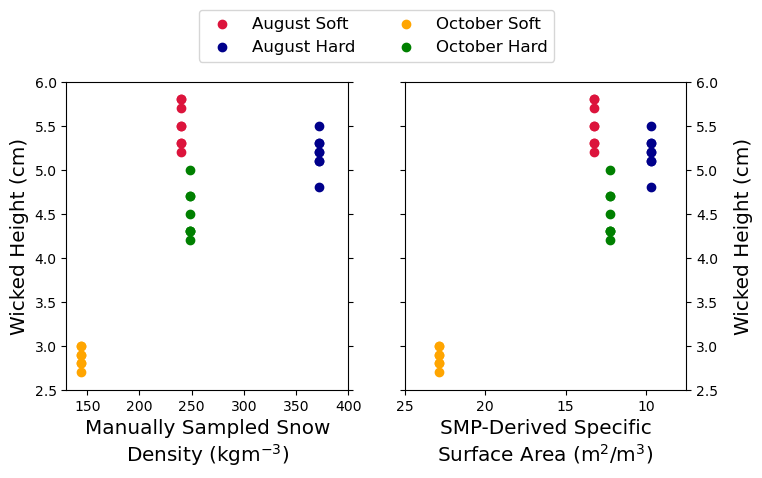

In [13]:
snow_densities = np.array([240., 372., 144., 248.])
snow_ssa = np.array([
13.222600627370367,
# August Hard
9.680658588115744,
# October Soft
22.880749226278603,
# October Hard
12.268096066305954,
])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

for (sheet, snowtype), label, color,density,ssa in zip(itertools.product(sheet_names,snowtypes),
                                                   labels,colors,snow_densities,snow_ssa):
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]

        ax1.scatter(np.full(len(df['Wicked Height']),density),
                    df['Wicked Height'],
                    label=label,
                   color=color)
        
        
        ax2.scatter(np.full(len(df['Wicked Height']),ssa),
                    df['Wicked Height'],
                    label=label,
                   color=color)
        

ax1.set_ylabel('Wicked Height (cm)',fontsize='x-large')
ax2.set_ylabel('Wicked Height (cm)',fontsize='x-large',labelpad=25)
    
ax1.set_xlabel('Manually Sampled Snow\nDensity (kgm$^{-3}$)',fontsize='x-large')
ax2.set_xlabel('SMP-Derived Specific\nSurface Area (m$^2$/m$^3$)',fontsize='x-large')

ax2.set_xlim(25,7.5)
ax1.set_xlim(130,400)

for ax in [ax1,ax2]: ax.set_ylim(2.5,6)

ax2.legend(bbox_to_anchor=(-0.1,1.15),fontsize='large',loc='center',ncol=2)
        
ax2.yaxis.tick_right()
ax2.yaxis.label_position = 'right'

ax2.tick_params(axis="y", which="both",right=True,left=True)
ax1.tick_params(axis="y", which="both",right=True,left=True)


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/figs/wicked_height.png',dpi=500,bbox_inches='tight')
plt.savefig('/home/robbie/Dropbox/dye_brine/Paper/Figures/F4.png',dpi=500,bbox_inches='tight')

In [ ]:
snow_densities

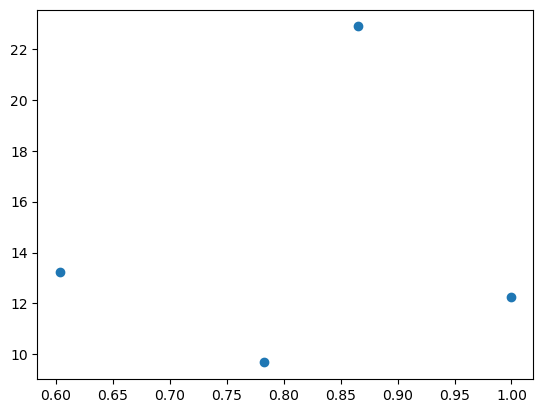

In [36]:
plt.scatter(Fpore,snow_ssa)

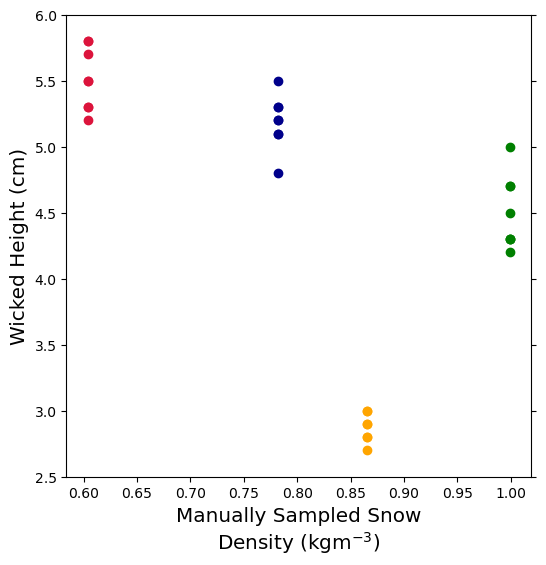

In [31]:
Fpore = [0.6036137532835595, 0.7824105515238352, 0.8650637654373111, 0.99954303540066]


fig, ax1 = plt.subplots(1,1,figsize=(6,6))

for (sheet, snowtype), label, color,density,ssa in zip(itertools.product(sheet_names,snowtypes),
                                                   labels,colors,Fpore,snow_ssa):
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]

        ax1.scatter(np.full(len(df['Wicked Height']),density),
                    df['Wicked Height'],
                    label=label,
                   color=color)
        

ax1.set_ylabel('Wicked Height (cm)',fontsize='x-large')
ax2.set_ylabel('Wicked Height (cm)',fontsize='x-large',labelpad=25)
    
ax1.set_xlabel('Manually Sampled Snow\nDensity (kgm$^{-3}$)',fontsize='x-large')
ax2.set_xlabel('SMP-Derived Specific\nSurface Area (m$^2$/m$^3$)',fontsize='x-large')

# ax2.set_xlim(25,7.5)
# ax1.set_xlim(130,400)

for ax in [ax1,ax2]: ax.set_ylim(2.5,6)

ax2.legend(bbox_to_anchor=(-0.1,1.15),fontsize='large',loc='center',ncol=2)
        
ax2.yaxis.tick_right()
ax2.yaxis.label_position = 'right'

ax2.tick_params(axis="y", which="both",right=True,left=True)
ax1.tick_params(axis="y", which="both",right=True,left=True)


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/figs/fpore_diagnostic.png',dpi=500,bbox_inches='tight')

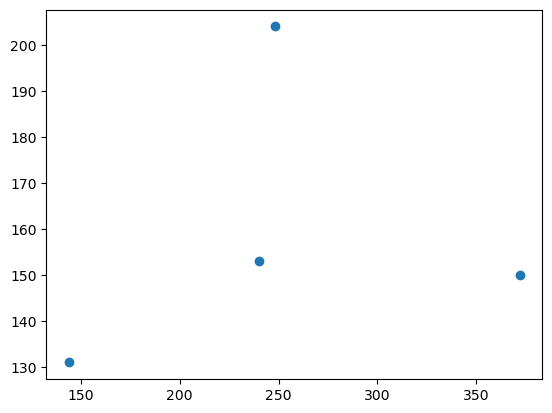

In [23]:
wick_factors=[153,150,131,204]

plt.scatter(snow_densities,wick_factors)

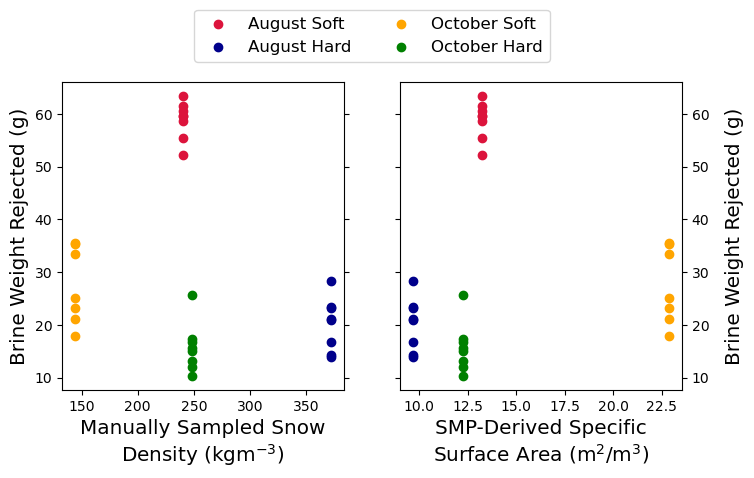

In [7]:
snow_densities = np.array([240., 372., 144., 248.])
snow_ssa = np.array([
13.222600627370367,
# August Hard
9.680658588115744,
# October Soft
22.880749226278603,
# October Hard
12.268096066305954,
])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

for (sheet, snowtype), label, color,density,ssa in zip(itertools.product(sheet_names,snowtypes),
                                                   labels,colors,snow_densities,snow_ssa):
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        df['salt_rejected'] = df['Brine Weight'] * df['Brine Sal']/1000
        
        ax1.scatter(np.full(len(df['Brine Weight']),density),
                    df['Brine Weight'],
                    label=label,
                   color=color)
        
        
        ax2.scatter(np.full(len(df['Brine Weight']),ssa),
                    df['Brine Weight'],
                    label=label,
                   color=color)
        

ax1.set_ylabel('Brine Weight Rejected (g)',fontsize='x-large')
ax2.set_ylabel('Brine Weight Rejected (g)',fontsize='x-large',labelpad=25)
    
ax1.set_xlabel('Manually Sampled Snow\nDensity (kgm$^{-3}$)',fontsize='x-large')
ax2.set_xlabel('SMP-Derived Specific\nSurface Area (m$^2$/m$^3$)',fontsize='x-large')

ax2.legend(bbox_to_anchor=(-0.1,1.15),fontsize='large',loc='center',ncol=2)
        
ax2.yaxis.tick_right()
ax2.yaxis.label_position = 'right'

ax2.tick_params(axis="y", which="both",right=True,left=True)
ax1.tick_params(axis="y", which="both",right=True,left=True)


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/supp_figs/brine_weight_density_ssa.png',dpi=500,bbox_inches='tight')

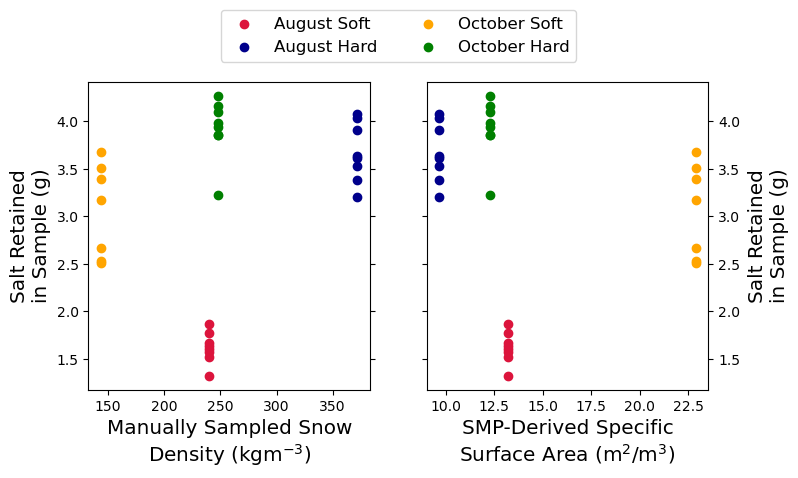

In [17]:
snow_densities = np.array([240., 372., 144., 248.])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

for (sheet, snowtype), label, color,density,ssa in zip(itertools.product(sheet_names,snowtypes),
                                                   labels,colors,snow_densities,snow_ssa):
        
        df = pd.read_excel('../data/Brine Sink Heights.xlsx',sheet_name=sheet)
        df = df[df['Type']==snowtype]
        df = df[df['Finished']==1]
        
        df['salt_rejected'] = df['Brine Weight'] * df['Brine Sal']/1000
        
        ax1.scatter(np.full(len(df['Brine Weight']),density),
                    5-df['salt_rejected'],
                    label=label,
                   color=color)
        
        
        ax2.scatter(np.full(len(df['Brine Weight']),ssa),
                    5-df['salt_rejected'],
                    label=label,
                   color=color)
        

ax1.set_ylabel('Salt Retained\nin Sample (g)',fontsize='x-large')
ax2.set_ylabel('Salt Retained\nin Sample (g)',fontsize='x-large',labelpad=35)
    
ax1.set_xlabel('Manually Sampled Snow\nDensity (kgm$^{-3}$)',fontsize='x-large')
ax2.set_xlabel('SMP-Derived Specific\nSurface Area (m$^2$/m$^3$)',fontsize='x-large')

ax2.legend(bbox_to_anchor=(-0.1,1.15),fontsize='large',loc='center',ncol=2)
        
ax2.yaxis.tick_right()
ax2.yaxis.label_position = 'right'

ax2.tick_params(axis="y", which="both",right=True,left=True)
ax1.tick_params(axis="y", which="both",right=True,left=True)

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/supp_figs/retained_salt.png',dpi=500,bbox_inches='tight')